<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/DATA_MINING/blob/main/image/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


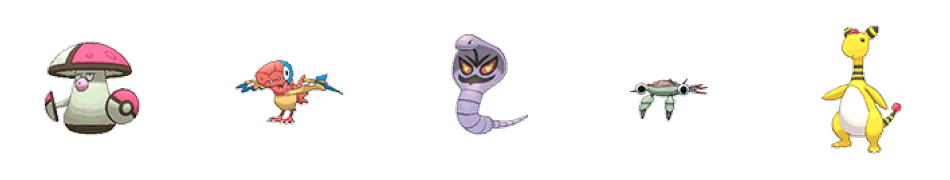

In [ ]:

from PIL import Image
import matplotlib.pyplot as plt
import os

# Directory containing images
image_dir = "/content/drive/MyDrive/DATA_MINING_DATASETS/img/images/images"

# Load a few images
image_files = os.listdir(image_dir)[:5]  # Load first 5 images for example
images = [Image.open(os.path.join(image_dir, file)) for file in image_files]

# Display images
plt.figure(figsize=(12, 8))
for i, image in enumerate(images):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()


In [ ]:
def extract_features(image, model):
    image = image.resize((224, 224))  # Resize the image to 224x224 required by VGG16

    if image.mode == 'L':  # Convert grayscale ('L') images to RGB
        image = image.convert('RGB')
    elif image.mode == 'RGBA':  # Convert RGBA images to RGB
        image = image.convert('RGB')

    image = img_to_array(image)  # Convert the image to an array
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))  # Add an extra dimension for batch size
    image = preprocess_input(image)  # Preprocess the image
    features = model.predict(image)  # Extract features
    return features


In [ ]:
def extract_features(image, model):
    image = image.resize((224, 224))  # Resize the image to 224x224 required by VGG16

    # Ensure the image has 3 channels (RGB)
    if image.mode != 'RGB':
        image = image.convert('RGB')

    image = img_to_array(image)  # Convert the image to an array

    # Check if the image has three channels
    if image.shape[-1] != 3:
        raise ValueError("The image should have 3 channels. Current image has {} channels.".format(image.shape[-1]))

    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))  # Add an extra dimension for batch size
    image = preprocess_input(image)  # Preprocess the image
    features = model.predict(image)  # Extract features
    return features



1/1 [==============================] - 1s 1s/step


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 1s 580ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


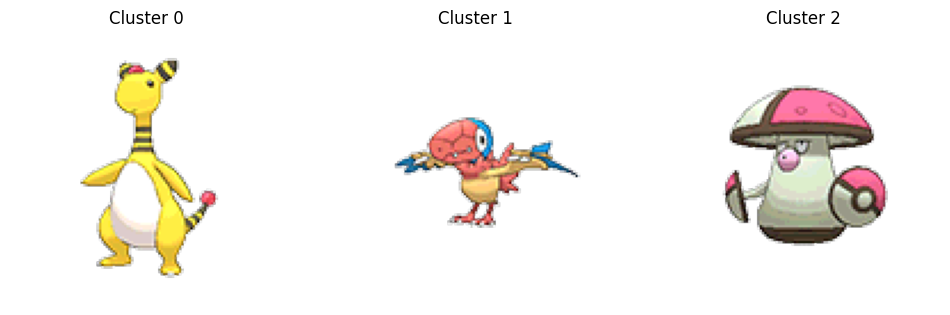

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load VGG16 model pre-trained on ImageNet data
model = VGG16(weights='imagenet')
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# Updated function to extract features from an image
def extract_features(image, model):
    image = image.resize((224, 224))  # Resize the image to 224x224 required by VGG16

    # Ensure the image has 3 channels (RGB)
    if image.mode != 'RGB':
        image = image.convert('RGB')

    image = img_to_array(image)  # Convert the image to an array

    # Check if the image has three channels
    if image.shape[-1] != 3:
        raise ValueError("The image should have 3 channels. Current image has {} channels.".format(image.shape[-1]))

    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))  # Add an extra dimension for batch size
    image = preprocess_input(image)  # Preprocess the image
    features = model.predict(image)  # Extract features
    return features

# Assuming 'images' is a list of PIL Image objects
features = np.array([extract_features(img, model) for img in images])
features = features.reshape(len(images), -1)  # Flatten the features

# Clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=22)
clusters = kmeans.fit_predict(features)

# Visualization
unique_clusters = set(clusters)
plt.figure(figsize=(12, 8))

for i, cluster in enumerate(unique_clusters):
    plt.subplot(1, len(unique_clusters), i + 1)
    # Find the first image in this cluster
    img_index = clusters.tolist().index(cluster)
    plt.imshow(images[img_index])
    plt.title(f"Cluster {cluster}")
    plt.axis('off')

plt.show()


In [ ]:
!pip install tpot





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=4e77fd041ac24459a5843c4c842eff9ed801f92d4688ca9f27cdc452350cc094
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
!pip install autokeras




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 18.0 MB/s eta 0:00:00


In [ ]:
!pip install autokeras tensorflow


In [ ]:
import tensorflow as tf

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/DATA_MINING_DATASETS/img',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/DATA_MINING_DATASETS/img',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 809 files belonging to 1 classes.
Using 648 files for training.
Found 809 files belonging to 1 classes.
Using 161 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

